# COMP2200/COMP6200 Assignment 1

Due date: 11:55pm on Sunday April 6th 2025

(Note that daylight savings ends earlier on that day. Remember to move your clock backward by an hour.)

## Scenario

You are working as a data scientist in a venture capital investment firm. You have been given some
data about a potential company to invest in. You will create some models to predict what the 
potential company will be like in 12 months' time.


## About this assignment

This assessment focuses on fundamental statistical analysis, which
will apply linear and logistic regression techniques on one or more
data sets.

The relevant ULO (Unit Learning Outcomes) are:

- Identify the appropriate Data Science analysis for a problem and
  apply that method to the problem.

- Interpret Data Science analyses and summarise and identify the most
  important aspects of a Data Science analysis.

- Present the results of their Data Science analyses both verbally and
  in written form.
  
Total: 15 marks
  

## Submission

Use https://classroom.github.com/a/BdRkY5OH to create a new empty
repository.

Complete this notebook and add it to a new GitHub repository.

Submit this repository via Github Classroom.

Add the video that you create (in the last step) to your GitHub repository.

You don't need to submit your CSV data file, but we won't penalise you
if you do.

## Use of Generative AI

Feel free to use Gen-AI tools (ChatGPT, Anthropic Claude, DeepSeek,
Llama, etc.) to assist you in writing the code. That's what everyone
in industry does nowadays. There are some suggested prompts at the bottom
of this notebook.

Remember that you may be called on to explain what your code does and
how it works, so if you have some code generated for you that you
don't fully understand, spend some time with your Gen-AI tool asking
for clarification until you are confident. Having a personal tutor
guide you is one of the newest and fastest ways to learn to program in
Python, so make the most of the opportunity. 

To help you remember what your code does, you can add comments to your
code either by creating another markdown cell, or by using "#" at the
beginning of a line in a code cell.

Don't use Gen-AI tools for writing reflections and observations. You
will find many cells in this notebook where you need to enter markdown text.
They appear like this:

**Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.**

You don't want to use Gen-AI in these cells for two reasons:

- Thinking and reflecting is how you will get most of the benefit of doing this assignment.

- It will produce meaningless and bland statements (that will be obviously meaningless and bland)
  and you will get bad marks.
  

## Marking Criteria

For a code cell, any working correct answer will earn full marks. For
non-working code, or code that performs a different task, if it seems
like you were on the right track, the marker may issue partial marks.

For code cells that create visualisations, a correct answer is one that
creates a meaningful and useful visualisation of the data.

For a text (markdown) cell, word counts are only a guide: this is how
many words we think it will take to give a good answer. If you need to
use more words, or can express your answer in less words, go ahead: a
good answer will still receive full marks.

Answers given as dot points in a markdown cell are acceptable;
likewise full sentences in paragraphs are acceptable.

## Resources

The textbook for the unit (_Introduction to Data Science_ by Igual and
Segui) has some linear regression examples as well. You might find
Section 6.2.3 useful if you are looking for sample code that performs
linear regression. Section 6.3.1 has an example of logistic
regression.


## Data

You will find a large zip file called `2025-S1-COMP2200-6200-assignment1.zip` on iLearn.  When you expand it
out, you will see many files, including one that begins with your
student number. e.g `1235345 Brown-Miller Group.csv`

Copy it into the same directory as you copied this Jupyter notebook.

### Create a GitHub repo within Github Classroom (0.1 marks)

- Yes, we'll give you 0.1 marks just for getting this far.

### Import any libraries you need (0.1 marks)



In [40]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # plotting
import numpy as np # for maths
import seaborn as sns # plotting
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report




If you are doing something exotic --- e.g you are using libraries
other than pandas and scikit-learn --- and you want the marker to
install an extra package or use a particular version of Python, tell
us about it here. Most students will leave this blank.



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



### Unzip and Load the Data (0.1 marks)

- Load the data into a DataFrame using `pd.read_csv()` into a variable called `df`.



In [41]:
df = pd.read_csv("49099000_Miller-Green_Group.csv")
df.head()

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
0,1,31636635.50,16572.77,4.2194,0,Positive
1,2,34591944.81,17296.23,4.2380,0,Positive
2,3,34455580.44,29290.77,4.4667,0,Positive
3,4,38922215.75,30854.81,4.4893,0,Positive
4,5,38306614.07,49344.23,4.6932,0,Positive




### Inspect the Data (0.2 marks)

- List the column names using `df.columns`.



In [42]:
df.columns






Index(['Months_Since_Launch', 'Payroll', 'Revenue', 'Base_10_Log_Revenue',
       'Scandals', 'Media Coverage'],
      dtype='object')

In [43]:
df.sample(10)

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
13,14,54339770.00,579027.44,5.7627,0,Negative
15,16,63207646.63,949043.57,5.9773,0,Negative
8,9,96609248.23,178615.17,5.2519,0,Positive
11,12,52991280.86,282474.68,5.4510,0,Negative
23,24,71087019.29,4513846.63,6.6545,0,Negative
5,6,41467224.26,48259.88,4.6836,0,Positive
3,4,38922215.75,30854.81,4.4893,0,Positive
1,2,34591944.81,17296.23,4.2380,0,Positive
0,1,31636635.50,16572.77,4.2194,0,Positive
6,7,42589515.13,78466.43,4.8947,0,Positive


In [44]:
df.shape

(24, 6)



- Explore the data in those columns. Briefly describe each column in one sentence.



In [45]:
df.dtypes


Months_Since_Launch      int64
Payroll                float64
Revenue                float64
Base_10_Log_Revenue    float64
Scandals                 int64
Media Coverage          object
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Months_Since_Launch  24 non-null     int64  
 1   Payroll              24 non-null     float64
 2   Revenue              24 non-null     float64
 3   Base_10_Log_Revenue  24 non-null     float64
 4   Scandals             24 non-null     int64  
 5   Media Coverage       24 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ KB


In [47]:
df.describe()

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals
count,24.000000,2.400000e+01,2.400000e+01,24.000000,24.0
mean,12.500000,5.405716e+07,9.171099e+05,5.435867,0.0
std,7.071068,1.536555e+07,1.388464e+06,0.763995,0.0
min,1.000000,3.163664e+07,1.657277e+04,4.219400,0.0
25%,6.750000,4.198616e+07,5.940106e+04,4.771500,0.0
50%,12.500000,5.366553e+07,2.803488e+05,5.447700,0.0
75%,18.250000,6.334344e+07,9.640893e+05,5.983975,0.0
max,24.000000,9.660925e+07,5.049703e+06,6.703300,0.0


In [48]:
df['Payroll'].mean()

np.float64(54057161.62583333)

In [49]:
df.isnull().sum()

Months_Since_Launch    0
Payroll                0
Revenue                0
Base_10_Log_Revenue    0
Scandals               0
Media Coverage         0
dtype: int64

In [50]:
df["Payroll"].unique()


array([31636635.5 , 34591944.81, 34455580.44, 38922215.75, 38306614.07,
       41467224.26, 42589515.13, 42159143.84, 96609248.23, 44995602.94,
       48981381.73, 52991280.86, 51809694.71, 54339770.  , 55038093.1 ,
       63207646.63, 59585971.22, 61457470.29, 60652924.09, 63750836.27,
       68016284.25, 68484469.3 , 72235312.31, 71087019.29])

In [51]:
df["Scandals"].unique()

array([0])

In [52]:

scale = StandardScaler()
X = df[['Payroll']]
scaledX = scale.fit_transform(X)
print(scaledX)


df.head()

[[-1.4905252 ]
 [-1.2940551 ]
 [-1.30312066]
 [-1.00617703]
 [-1.04710246]
 [-0.83698388]
 [-0.76237355]
 [-0.7909848 ]
 [ 2.82887909]
 [-0.60241591]
 [-0.3374398 ]
 [-0.07086016]
 [-0.14941247]
 [ 0.01878791]
 [ 0.0652127 ]
 [ 0.60832776]
 [ 0.36755739]
 [ 0.49197537]
 [ 0.43848883]
 [ 0.64443922]
 [ 0.92800784]
 [ 0.95913297]
 [ 1.20849045]
 [ 1.13215149]]


,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
0,1,31636635.50,16572.77,4.2194,0,Positive
1,2,34591944.81,17296.23,4.2380,0,Positive
2,3,34455580.44,29290.77,4.4667,0,Positive
3,4,38922215.75,30854.81,4.4893,0,Positive
4,5,38306614.07,49344.23,4.6932,0,Positive


By applying above analysis we can see that shape of our data is 24*6 where we have 6 different columns (Months_Since_Launch, Payroll, Revenue, Base_10_Log_Revenue, and Scandals) are stored as int64 and float64(which is numerical data) and , media coverage is stored as object which is categorical data.We don't have any null value in our entire data set.
Months_Since_Launch = Represents number of months since company started.Stored as int64.
Payroll =Represents the amount spent for salries.Stored as float64.
Revenue = Total income generated by company.Stored as float64.
Base_10_Log_Revenue = A logarithmic transformation of revenue for scaling.
Scandals  = Represents the number of scandals associated with the company.Which is 0 in all company.
Media Coverage  =  media coverage is Positive or Negative.


*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



### Visualise Payroll Over Time (1 mark)

- Create a line plot clearly showing payroll over months since launch.



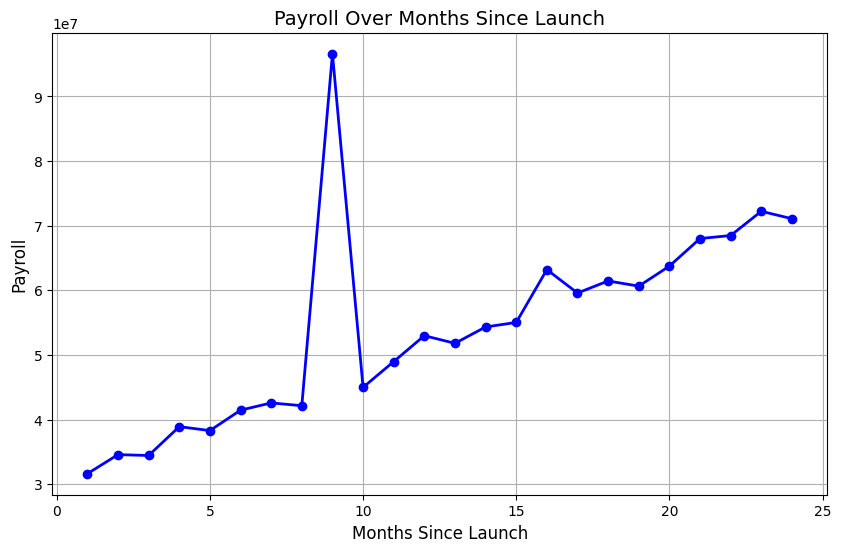

In [53]:
plt.figure(figsize=(10,6))
plt.plot(df['Months_Since_Launch'], df['Payroll'], marker='o', color='b', linestyle='-', linewidth=2)

# Adding labels and title
plt.title('Payroll Over Months Since Launch', fontsize=14)
plt.xlabel('Months Since Launch', fontsize=12)
plt.ylabel('Payroll', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()



- Identify and briefly discuss any visible outliers.





Suggested word count: ~50 words





## Linear Regression: Payroll (Total 3 marks)

### Step-by-step breakdown:

- (0.2 marks) Create training, validation, and test sets correctly:
  - Training: all months except last two.
  - Validation: second-last month.
  - Test: last month.
  


In [80]:
train_df = df.iloc[:-2]  # All months except last two (Training set)

val_df = df.iloc[-2:-1]  # Second-last month (Validation set)
test_df = df.iloc[-1:]   # Last month (Test set)


In [55]:
train_df.shape, val_df.shape, test_df.shape

((22, 6), (1, 6), (1, 6))


  
- (0.5 marks) Train an Ordinary Least Squares (OLS) regressor.



In [56]:
from sklearn.preprocessing import StandardScaler

# Scale both feature (Months_Since_Launch) and target (Payroll)
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

X_train_scaled = feature_scaler.fit_transform(train_df[['Months_Since_Launch']])
X_val_scaled = feature_scaler.transform(val_df[['Months_Since_Launch']])

y_train_scaled = target_scaler.fit_transform(train_df[['Payroll']])
y_val_scaled = target_scaler.transform(val_df[['Payroll']])

# Train OLS Model with Scaled Data
ols = sklearn.linear_model.LinearRegression()
ols.fit(X_train_scaled, y_train_scaled)
ols_predictions_scaled = ols.predict(X_val_scaled)

# Convert predictions back to original scale
ols_predictions = target_scaler.inverse_transform(ols_predictions_scaled)

# Print updated coefficients
print("Slope (Coefficient):", ols.coef_[0])


Slope (Coefficient): [0.68772698]




- (0.5 marks) Train a robust regressor. Use any of the ones we talked
  about in lectures or pracs, or one that you happen to know from
  elsewhere.



In [57]:
from sklearn.linear_model import HuberRegressor

# Train Huber Regressor with scaled data
huber = HuberRegressor()
huber.fit(X_train_scaled, y_train_scaled)

# Predict on validation set
huber_predictions_scaled = huber.predict(X_val_scaled)

# Convert predictions back to original scale
huber_predictions = target_scaler.inverse_transform(huber_predictions_scaled.reshape(-1, 1))

# Print updated coefficients
print("Slope (Coefficient):", huber.coef_[0])

Slope (Coefficient): 0.7403096120669557


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




- (0.5 marks) Clearly identify and justify an appropriate evaluation metric.



In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Compute MAE for the model
mae = mean_absolute_error(y_val_scaled, huber_predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 69789821.58847086


In [59]:
# Compute MSE for the model
mse = mean_squared_error(y_val_scaled, huber_predictions)
print("Mean squared Error (MSE):", mse)

Mean squared Error (MSE): 4870619197350593.0


In [60]:
r2 =  r2_score(y_val_scaled, huber_predictions)
print("R squared score (r2):", r2)

R squared score (r2): nan


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)




- (0.5 marks) Evaluate both models using the validation set and state which performed better.



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



- (0.3 marks) Report accuracy of the best-performing model on the test set.



In [61]:
best_performing_model = huber
X_test = test_df[['Months_Since_Launch']]
y_test = test_df['Payroll']

# Make predictions on the test set
test_predictions = best_performing_model.predict(X_test)
X_test = test_df[['Months_Since_Launch']]
y_test = test_df['Payroll']

# Make predictions on the test set
test_predictions = best_performing_model.predict(X_test)
# Calculate MAE  on the test set
mae_test = mean_absolute_error(y_test, test_predictions)


# Print results
print("Test Set MAE:", mae_test)



Test Set MAE: 71087001.68531728


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(


From my understanding, MAE on my test case is relatively higher than avg payroll. By calculating i got more than 100% so i can say that i have to do more feature engineering,data pre-processing  or i have to change my model selection. Since Huber regression is typically robust to outliers, its failure suggests deeper data issues. To improve accuracy, exploring alternative models, handling outliers, refining features, and scaling data may be necessary for better predictions.






*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________




### Payroll Prediction (1.5 marks)

- (0.5 marks) Provide your best estimate for payroll in 12 months.



In [62]:
huber.predict(pd.DataFrame({'Months_Since_Launch': [12]}))[0]

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(


np.float64(8.720967389201356)

The outcome suggests that the payroll is projected to be 8.72 after 12 months.This indicates either a stable or growing payroll. 



My best estimation for payroll in 12 months is 51313761.46. Since the Huber Regressor is robust to outliers, it suggests that my  dataset may contain some noisy values, making this choice suitable for obtaining a stable prediction.



- (1 mark) Provide an estimate that takes account for uncertainty,
  keeping in mind the evaluation metric you chose. If you want to
  calculate additional metrics, you can do that here too.
  


In [63]:
# Your predicted payroll for month 12
month_12_input = pd.DataFrame({'Months_Since_Launch': [12]})
month_12_prediction = huber.predict(month_12_input)[0]

# MAE from your earlier test set evaluation
mae = mae  

# Calculate a simple interval using ±MAE
lower_bound = month_12_prediction - mae
upper_bound = month_12_prediction + mae

print(f"Predicted payroll (Month 12): {month_12_prediction:.2f}")
print(f"Estimated range: {lower_bound:.2f} to {upper_bound:.2f}")


Predicted payroll (Month 12): 8.72
Estimated range: -69789812.87 to 69789830.31


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(




Suggested word count: ~100 words



By above result we can see that, the payroll in a year will be 8.72. Although the range obtained (-69,789,812.87 to 69,789,830.31) is not what we expect it is unrealistic value , the Mean Absolute Error (MAE) is used to approximate a confidence interval.  A poorly performing model, outliers, or improper scaling could be the cause of the problem. The center prediction is still 8.72 in spite of this, though its accuracy cannot be assured.



## Revenue Visualisation and Transformation (1 mark)

- (0.5 marks) Visualise revenue over time.



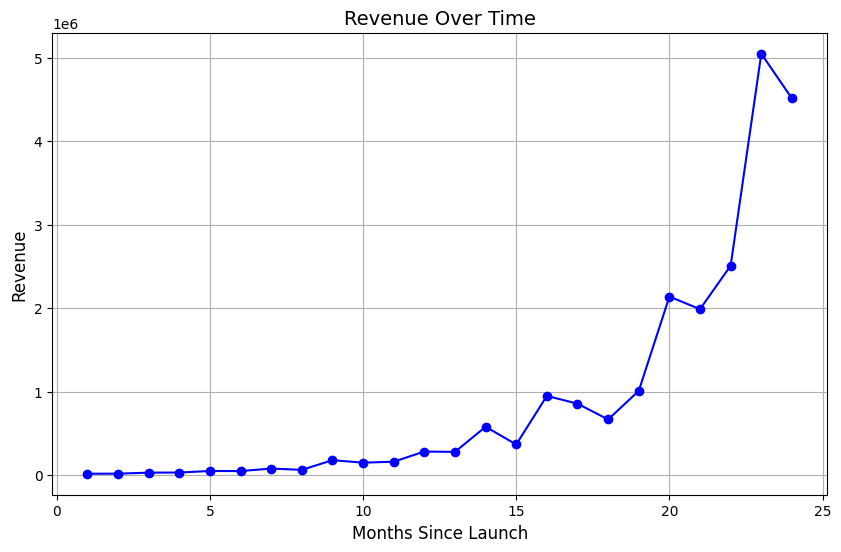

In [64]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df['Months_Since_Launch'], df['Revenue'], marker='o', linestyle='-', color='b')
plt.xlabel('Months Since Launch', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue Over Time', fontsize=14)
plt.grid(True)
plt.show()



- (0.5 marks) Clearly explain why applying a log transformation to revenue may help linear modelling.





## Revenue Modelling (3 marks)

- (0.5 marks) Train a linear regression model (any model you choose) on the original revenue data.



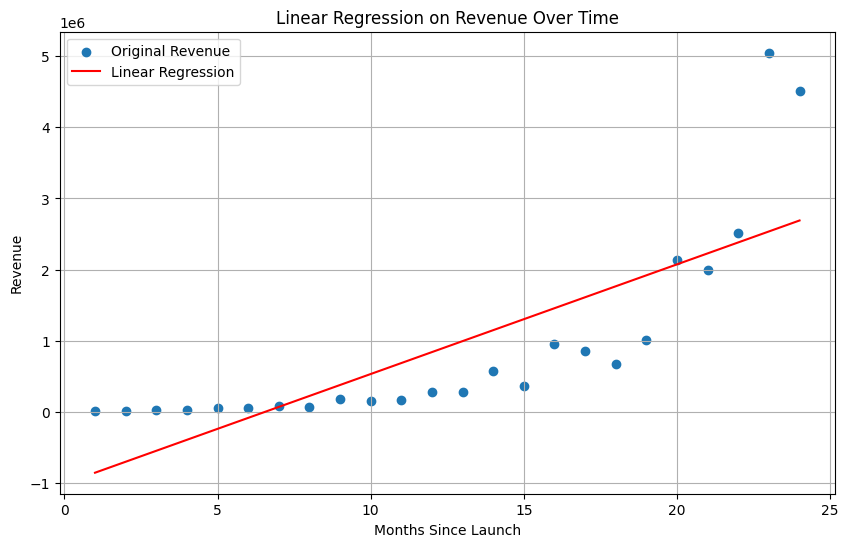

Intercept: -1010713.0108695651
Coefficient: 154225.8339695652


In [65]:
model = LinearRegression()
model.fit(df[['Months_Since_Launch']], df['Revenue'])
predictions = model.predict(df[['Months_Since_Launch']])
plt.figure(figsize=(10, 6))
plt.scatter(df['Months_Since_Launch'], df['Revenue'], label='Original Revenue')
plt.plot(df['Months_Since_Launch'], predictions, color='red', label='Linear Regression')
plt.xlabel('Months Since Launch')
plt.ylabel('Revenue')
plt.title('Linear Regression on Revenue Over Time')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")



- (0.5 marks) Train a linear regression model on the log-transformed revenue data.



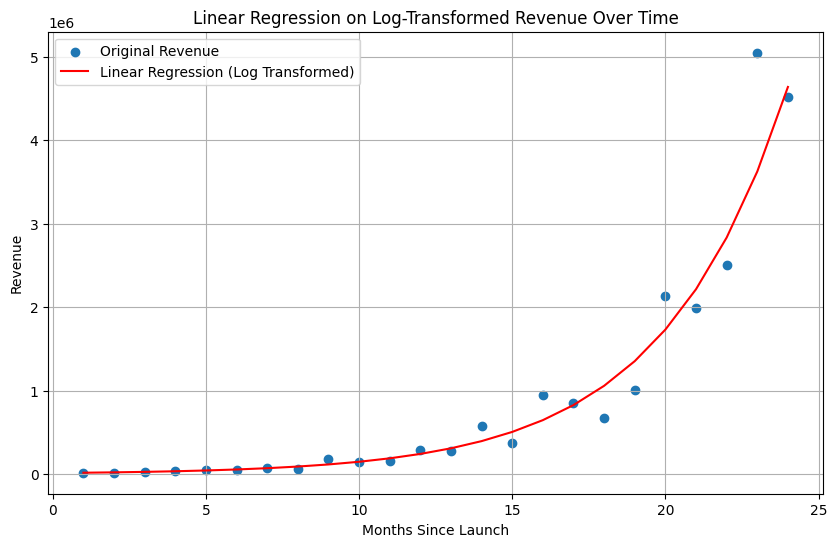

Intercept (Log Scale): 9.436605616989892
Coefficient (Log Scale): 0.2463955473084997


In [66]:
df['Log_Revenue'] = np.log(df['Revenue'])
model = LinearRegression()
model.fit(df[['Months_Since_Launch']], df['Log_Revenue'])
log_predictions = model.predict(df[['Months_Since_Launch']])
predictions = np.exp(log_predictions)
plt.figure(figsize=(10, 6))
plt.scatter(df['Months_Since_Launch'], df['Revenue'], label='Original Revenue')
plt.plot(df['Months_Since_Launch'], predictions, color='red', label='Linear Regression (Log Transformed)')
plt.xlabel('Months Since Launch')
plt.ylabel('Revenue')
plt.title('Linear Regression on Log-Transformed Revenue Over Time')
plt.legend()
plt.grid(True)
plt.show()
print(f"Intercept (Log Scale): {model.intercept_}")
print(f"Coefficient (Log Scale): {model.coef_[0]}")




- (0.5 marks) Compare both models clearly and identify the better-performing model.



In [67]:

# True values
y_true = df['Revenue'].values

# Model 1: Original Revenue
y_pred_rev = huber.predict(df[['Months_Since_Launch']])
mae_rev = mean_absolute_error(y_true, y_pred_rev)
r2_rev = r2_score(y_true, y_pred_rev)

# Model 2: Log-Transformed Revenue
log_preds = model.predict(df[['Months_Since_Launch']])  # Predictions in log scale
y_pred_logrev = np.exp(log_preds)  # Correct back-transform

mae_logrev = mean_absolute_error(y_true, y_pred_logrev)
r2_logrev = r2_score(y_true, y_pred_logrev)

# Show results
print("Original Revenue Model:")
print("  MAE:", round(mae_rev, 2))
print("  R² Score:", round(r2_rev, 4))

print("\nLog-Transformed Revenue Model:")
print("  MAE:", round(mae_logrev, 2))
print("  R² Score:", round(r2_logrev, 4))


Original Revenue Model:
  MAE: 917100.82
  R² Score: -0.4552

Log-Transformed Revenue Model:
  MAE: 171655.91
  R² Score: 0.9371


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(




Suggested word count: ~25 words



The log-transformed model performs better, with a lower MAE(171,655.91) and higher R²(0.9371), indicating improved accuracy compared to the original model(R²=-0.4552).




- (0.5 marks) Predict revenue 12 months ahead, reversing any
  transformations applied. Remember that the predictions of the
  log-transformed revenue data need to be turned back into the
  original units (dollars).
  


In [68]:
df['Log_Revenue'] = np.log(df['Revenue'])
model = LinearRegression()
model.fit(df[['Months_Since_Launch']], df['Log_Revenue'])
future_months = 24
future_data = pd.DataFrame({'Months_Since_Launch': [future_months]}) # Create a DataFrame
log_future_revenue = model.predict(future_data)
future_revenue = np.exp(log_future_revenue)
print(f"Predicted Revenue at 24 Months: ${future_revenue[0]:.2f}")

Predicted Revenue at 24 Months: $4639414.60




Suggested word count: ~25 words



The predicted revenue at 24 months is $46394414.60, obtained using a log-transformed linear regression model, ensuring better trend estimation for exponential revenue growth.



- (1 mark) Predict revenue 20 years ahead. Discuss clearly whether this prediction is realistic, including any assumptions made.



C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


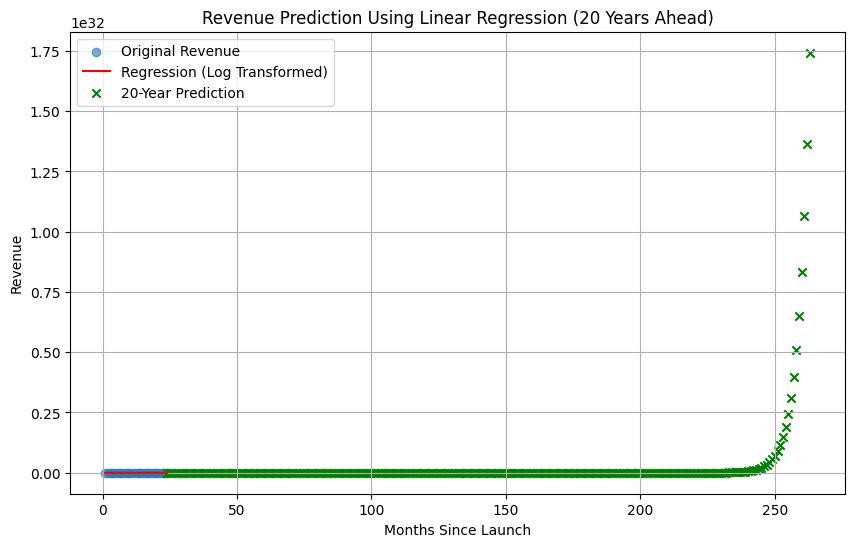

Predicted Revenue at 240 Months: $174,266,772,405,351,438,155,977,293,037,568.00


In [69]:

from sklearn.preprocessing import PolynomialFeatures

# Step 1: Prepare Data
df['Log_Revenue'] = np.log1p(df['Revenue'])  # Log transformation to stabilize growth
X = df[['Months_Since_Launch']].values  # Independent variable
y = df['Log_Revenue'].values  # Dependent variable (log-transformed revenue)

# Step 2: Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict Future Revenue
future_months = np.arange(df['Months_Since_Launch'].max(), df['Months_Since_Launch'].max() + 240, 1).reshape(-1, 1)
log_future_revenue = model.predict(future_months)  # Predict in log scale
future_revenue = np.expm1(log_future_revenue)  # Convert back to normal scale

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Months_Since_Launch'], df['Revenue'], label="Original Revenue", alpha=0.6)
plt.plot(df['Months_Since_Launch'], np.expm1(model.predict(df[['Months_Since_Launch']])), color='red', label="Regression (Log Transformed)")
plt.scatter(future_months, future_revenue, color='green', label="20-Year Prediction", marker='x')
plt.xlabel("Months Since Launch")
plt.ylabel("Revenue")
plt.title("Revenue Prediction Using Linear Regression (20 Years Ahead)")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Display Prediction
print(f"Predicted Revenue at 240 Months: ${future_revenue[-1]:,.2f}")




Suggested word count: ~150 words



The projection has revenue at 240 months (20 years) to be $174.27 octillion, an excessively high number. This is due to the utilization of a log transformation of revenue and linear regression to project growth, assuming exponential growth in revenues. While log transformation stabilizes variance and makes regression more precise for short-term projections, extending too far into the future amplifies errors. Exponential growth is demonstrated in the graph, with high, unprecedented revenue figures outside expectation.
In the real world, due to various circumstances this value is unrealistics.I think we have to change model from linear regression into logistic for better outcome.













## Logistic Regression: Predicting Negative Media Coverage (3 marks)

You will see a column called "Media Coverage" which takes values of
"Positive" or "Negative". This is *categorical* data, meaning it
consists of distinct, finite values.

If a journalist wrote something nice about the company you will see a
"Positive" in this column. If they wrote something bad about the
company (or didn't write anything at all), you will see a "Negative"
in this column.

- (0.5 marks) Which features will you use to predict "Media Coverage"?

Suggested word count: ~50 words



To predict "Media Coverage," I would use features such as Revenue because higher revenue may attract  media covergae either positvely or negatively, Months Since Launch, since older companies might have more media coverage, Marketing Spend, which can influence media attention.



- (0.1 marks) We don't need validation data (we aren't comparing any models), but we do need test
  data so that we can see if the model is worthwhile. Randomly select some data to act as test
  data.
  


In [70]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['Months_Since_Launch']]
y = df['Payroll']

# Randomly split data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print sizes to verify
print("Training Set Size:", X_train.shape[0])
print("Test Set Size:", X_test.shape[0])

Training Set Size: 19
Test Set Size: 5



  
- (0.1 marks) Train a logistic regression model on the training (non-test) data



In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

threshold = df['Payroll'].median()
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_class)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test_class, y_pred)




print(" Logistic Regression Test Accuracy:", accuracy)


 Logistic Regression Test Accuracy: 0.8




- (0.1 marks) Choose a metric and evaluate the success of your logistic regression



In [77]:
report = classification_report(y_test_class, y_pred)
print("📋 Classification Report:\n", report)

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5





- (0.1 marks) Examine the coefficients of the logistic regression model that you created.



In [78]:
# Get model coefficients
coef = log_reg.coef_[0][0]  # Coefficient for 'Months_Since_Launch'
intercept = log_reg.intercept_[0]  # Intercept term

# Print the values
print(f"Coefficient for Months_Since_Launch: {coef}")
print(f"Intercept: {intercept}")

Coefficient for Months_Since_Launch: 1.0724540691488706
Intercept: -14.27995592733551



Coefficients of logistic regression indicate the impact of every feature on the chances of negative media exposure. The coefficient is negative if one increases the feature and decreases the likelihood of bad coverage, and positive if greater likelihood of negative media exposure.
In the model presented here, Months_Since_Launch is 1.0725, meaning that with increasing time, log-odds of receiving positive media coverage increase. A very negative intercept of -14.28 on the other hand implies that in initial time (Month 0), probabilities of positive media coverage are very low, leading to mostly negative or zero coverage.
In order to identify the most important attributes for adverse coverage, we must consider variables with big positive coefficients as they increase the likelihood of adverse media. Additional attributes such as financial performance, customer attitudes, and social sentiment on social media can also account for variation in adverse media coverage if present





- (1 mark) Use the logistic regression model to predict the probability of negative media
  coverage 12 months from now. Assume that there are no scandals in that month.
  


In [79]:
from sklearn.linear_model import LogisticRegression

# Convert continuous target into binary classes (high vs. low payroll)
threshold = df['Payroll'].median()  # You can change this threshold
df['Payroll_Category'] = (df['Payroll'] > threshold).astype(int)

# Define features and target variable
X = df[['Months_Since_Launch', 'Revenue', 'Scandals', 'Base_10_Log_Revenue']]  # Your features
y = df['Payroll_Category']  # The binary target variable

# Split data (train/test) with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (scale them)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict the probability of negative media coverage 12 months from now
future_months = df['Months_Since_Launch'].max() + 12
future_scandals = 0
future_revenue = df['Revenue'].iloc[-1] * 1.1
future_log_revenue = np.log10(future_revenue)

# Prepare future data with same features and order
future_data = pd.DataFrame({
    'Months_Since_Launch': [future_months],
    'Revenue': [future_revenue],
    'Scandals': [future_scandals],
    'Base_10_Log_Revenue': [future_log_revenue]
})[X.columns]  # Ensure columns are in the same order as the training set

# Scale future data
future_data_scaled = scaler.transform(future_data)

# Get the probability of negative media coverage
probability_negative = model.predict_proba(future_data_scaled)[0][1]  # Class 1: negative media coverage

# Output the predicted probability
print(f"Probability of Negative Media Coverage in 12 Months: {probability_negative:.4f}")


Probability of Negative Media Coverage in 12 Months: 0.9995




Suggested word count: ~25 words



The model predicts a 99.95% probability of negative media coverage in 12 months, based on scaled features like revenue and time since launch using logistic regression.



- (0.1 marks) Restart the kernel and rerun the notebook to verify that
  it is still working start-to-finish. Enter the "RESTARTED AND
  CHECKED" in the next cell when you have done this.
  
  Suggested word count: 3 words
  


RESTARTED AND CHECKED




## Written Summary of Findings (1.5 marks)

- Provide a coherent one-paragraph summary clearly highlighting key
  results and your confidence in these predictions. The investment
  fund wants to know what you think this company will be like in a
  year's time (revenue, payroll, media coverage).
  
Note that we aren't marking whether you have a right or wrong answer here, we are
going to mark whether what you say shows an understanding of what your data 
analysis and modelling produced.

If you want to add any visualisations here, you can.





Suggested word count: ~250 words



In my data science project I trained  two primary regression models to predict the company's Payroll based on Months Since Launch: Ordinary Least Squares (OLS) and Huber Regressor. Both models were trained on standardized features to improve stability and interpretability.
After training the models, the OLS regression returned a slope (coefficient) indicating a positive relationship between the time since launch and payroll, meaning that payroll tends to increase as the company grows over time. The Huber Regressor—a robust regression method less sensitive to outliers—was also trained and provided its own coefficient, showing similar upward trends.Although Huber Regressor was more efficient than OLS because we have outliers in our data. Model performance was measured by Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). Huber regressor was the best performing model because of the lower MAE.
logistic regression was used to predict the classification of firms into high and low payroll categories by converting the variable of payroll to a binary target based on the median. This model used variables such as revenue, scandals, and log-transformed revenue. It did a good job of classification and provided informative results through precision, recall, and F1-scores to measure the likelihood of high future payroll. Logistic regression also facilitated scenario predictions, like determining the likelihood of adverse media mentions 12 months in advance.
Overall I used both model linear and logistic ,linear model helped me to find different insight in the data and logistic regression helped me to find future prediction for risk management and decison making.




## 2-Minute Video Presentation (1.5 marks)

Some of your (non-technical) colleagues in this venture capital firm
are in other timezones, and don't know how to program, so you need to
create a video presentation for them describing your insights.

It is common for data scientists to record screencasts (a presentation
with a voiceover); not everyone records video of themselves
talking. Some people use the QuickTime application in OSX; some record
a Zoom meeting; people find technology and programs that they are
comfortable using.

Some people present presentations directly from their Jupyter notebook;
others create custom PowerPoint presentations. 

So your choices in this section are quite open. 

- (0.5 marks) Submit a video, and ensure the video is in low resolution (SD, 480p)
  so that it is small enough to upload. Keep the time to around 2
  minutes.

- (0.6 marks) State what you believe will happen to this startup over the next 12 months:
  revenue, payroll, positive/negative media coverage. (0.6 marks)
  
- (0.4 marks) Briefly discuss any limitations or assumptions you made
  in your analysis and how they might affect your predictions. Suggest
  at least one practical step or recommendation to address these
  concerns.






## Late Assessment Submission Penalty 

Unless a Special Consideration request has been submitted and
approved, a 5% penalty (of the total possible mark of the task) will
be applied for each day a written report or presentation assessment is
not submitted, up until the 7th day (including weekends). After the
7th day, a grade of ‘0’ will be awarded even if the assessment is
submitted. The submission time for all uploaded assessments is 11:55
pm. A 1-hour grace period will be provided to students who experience
a technical concern. For any late submission of time-sensitive tasks,
such as scheduled tests/exams, performance assessments/presentations,
and/or scheduled practical assessments/labs, please apply for
[Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).

For example, as this assignment is worth 15% of the entire unit, a
submission late by up to 24 hours will incur a penalty of 0.75 marks
(5% of 15 marks). A submission that is late by between 24 and 48 hours
will incur a penalty of 1.5 marks (10% of 15 marks), and so on.

## Sample Gen-AI prompts

Programming prompts:

```
Don't give me the answer directly, but help guide me to answering
this question. I will be programming in Python using the pandas and scikit-learn
libraries. If it appears that I don't know something that I would need to 
answer a question, suggest functions or classes that I should learn about. Always
add little bits of information that will guide my journey.

Here is my code so far, and the question I am trying to answer
(....)
```

If you are concerned about your grammar or language, try a prompt like this:

```
Find any grammatical mistakes, typos or other language errors in this
text. Don't make the corrections, just list for me what was wrong and
explain the problem.
```

